In [1]:
#Import Library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import squarify
import plotly.express as px
import plotly.graph_objects as go

from statsmodels import api as sm
import pylab as py
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy.stats import kstest,norm
from scipy.stats import norm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn import metrics
from scipy.stats import chi2_contingency

In [2]:
data_oct = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\2019-Oct.csv")
data_oct

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,4,5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062.0,2.103810e+18,NaN,shiseido,35.79,541312140.0,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821.0,2.053010e+18,appliances.environment.water_heater,aqua,33.20,554748717.0,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506.0,2.053010e+18,furniture.living_room.sofa,NaN,543.10,519107250.0,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067.0,2.053010e+18,computers.notebook,lenovo,251.74,550050854.0,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237.0,2.053010e+18,electronics.smartphone,apple,1081.98,535871217.0,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
1047554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_nov = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\2019-Nov.csv")
data_nov

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,4,5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461.0,2.053010e+18,electronics.smartphone,xiaomi,489.07,520088904.0,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088.0,2.053010e+18,appliances.sewing_machine,janome,293.65,530496790.0,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664.0,2.053010e+18,NaN,creed,28.31,561587266.0,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530.0,2.053010e+18,appliances.kitchen.washer,lg,712.87,518085591.0,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775.0,2.053010e+18,electronics.smartphone,xiaomi,183.27,558856683.0,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...
1048104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
frames = [data_oct, data_nov]
data=pd.concat(frames)

In [5]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062.0,2.103810e+18,NaN,shiseido,35.79,541312140.0,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821.0,2.053010e+18,appliances.environment.water_heater,aqua,33.20,554748717.0,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506.0,2.053010e+18,furniture.living_room.sofa,NaN,543.10,519107250.0,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067.0,2.053010e+18,computers.notebook,lenovo,251.74,550050854.0,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237.0,2.053010e+18,electronics.smartphone,apple,1081.98,535871217.0,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [6]:
data.shape

(2095668, 9)

In [7]:
data.isnull().sum()

event_time        698596
event_type        698596
product_id        698596
category_id       698596
category_code    1144086
brand             902339
price             698596
user_id           698596
user_session      698596
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [10]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2019-10-01 00:00:00 UTC,view,3900821.0,2.053010e+18,appliances.environment.water_heater,aqua,33.20,554748717.0,9333dfbd-b87a-4708-9857-6336556b0fcc
3,2019-10-01 00:00:01 UTC,view,1307067.0,2.053010e+18,computers.notebook,lenovo,251.74,550050854.0,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237.0,2.053010e+18,electronics.smartphone,apple,1081.98,535871217.0,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613.0,2.053010e+18,computers.desktop,pulser,908.62,512742880.0,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
8,2019-10-01 00:00:10 UTC,view,28719074.0,2.053010e+18,apparel.shoes.keds,baden,102.71,520571932.0,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
...,...,...,...,...,...,...,...,...,...
698526,2019-11-01 11:57:59 UTC,view,1004767.0,2.053010e+18,electronics.smartphone,samsung,242.18,520256246.0,73f84130-6ea4-424b-a3a5-548f59fee7ac
698527,2019-11-01 11:57:59 UTC,view,1003801.0,2.053010e+18,electronics.smartphone,apple,635.10,559202720.0,9d92715b-e373-41aa-880b-ec36b5889636
698528,2019-11-01 11:57:59 UTC,view,1201429.0,2.172370e+18,electronics.tablet,bq,53.88,561845754.0,bc6ae220-b3b0-4ddf-ad80-144b0414db03
698530,2019-11-01 11:57:59 UTC,view,22400179.0,2.053010e+18,electronics.audio.microphone,sven,4.44,565902979.0,61d7776a-8ce2-4ac5-8924-bed8fefb86ce


In [11]:
data.drop(columns="category_id", inplace=True)

In [12]:
data

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
1,2019-10-01 00:00:00 UTC,view,3900821.0,appliances.environment.water_heater,aqua,33.20,554748717.0,9333dfbd-b87a-4708-9857-6336556b0fcc
3,2019-10-01 00:00:01 UTC,view,1307067.0,computers.notebook,lenovo,251.74,550050854.0,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237.0,electronics.smartphone,apple,1081.98,535871217.0,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613.0,computers.desktop,pulser,908.62,512742880.0,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
8,2019-10-01 00:00:10 UTC,view,28719074.0,apparel.shoes.keds,baden,102.71,520571932.0,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
...,...,...,...,...,...,...,...,...
698526,2019-11-01 11:57:59 UTC,view,1004767.0,electronics.smartphone,samsung,242.18,520256246.0,73f84130-6ea4-424b-a3a5-548f59fee7ac
698527,2019-11-01 11:57:59 UTC,view,1003801.0,electronics.smartphone,apple,635.10,559202720.0,9d92715b-e373-41aa-880b-ec36b5889636
698528,2019-11-01 11:57:59 UTC,view,1201429.0,electronics.tablet,bq,53.88,561845754.0,bc6ae220-b3b0-4ddf-ad80-144b0414db03
698530,2019-11-01 11:57:59 UTC,view,22400179.0,electronics.audio.microphone,sven,4.44,565902979.0,61d7776a-8ce2-4ac5-8924-bed8fefb86ce


In [13]:
data.shape

(872726, 8)

In [14]:
data["price"].describe()

count    872726.000000
mean        360.893294
std         391.165654
min           0.880000
25%         107.440000
50%         212.100000
75%         463.310000
max        2574.070000
Name: price, dtype: float64

In [15]:
#Saving a copy of preprocessed data
data.to_csv("C:\\Users\\LENOVO\\Desktop\\Cleaned_Data.csv")

In [16]:
df = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\Cleaned_Data.csv")

In [17]:
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
0,1,2019-10-01 00:00:00 UTC,view,3900821.0,appliances.environment.water_heater,aqua,33.20,554748717.0,9333dfbd-b87a-4708-9857-6336556b0fcc
1,3,2019-10-01 00:00:01 UTC,view,1307067.0,computers.notebook,lenovo,251.74,550050854.0,7c90fc70-0e80-4590-96f3-13c02c18c713
2,4,2019-10-01 00:00:04 UTC,view,1004237.0,electronics.smartphone,apple,1081.98,535871217.0,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
3,5,2019-10-01 00:00:05 UTC,view,1480613.0,computers.desktop,pulser,908.62,512742880.0,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
4,8,2019-10-01 00:00:10 UTC,view,28719074.0,apparel.shoes.keds,baden,102.71,520571932.0,ac1cd4e5-a3ce-4224-a2d7-ff660a105880


In [18]:
df['event_type'].unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [19]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [20]:
df=reduce_mem_usage(df)

Memory usage after optimization is: 44.94 MB
Decreased by 25.0%


In [21]:
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
0,1,2019-10-01 00:00:00 UTC,view,3900821.0,appliances.environment.water_heater,aqua,33.1875,554748736.0,9333dfbd-b87a-4708-9857-6336556b0fcc
1,3,2019-10-01 00:00:01 UTC,view,1307067.0,computers.notebook,lenovo,251.7500,550050880.0,7c90fc70-0e80-4590-96f3-13c02c18c713
2,4,2019-10-01 00:00:04 UTC,view,1004237.0,electronics.smartphone,apple,1082.0000,535871232.0,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
3,5,2019-10-01 00:00:05 UTC,view,1480613.0,computers.desktop,pulser,908.5000,512742880.0,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
4,8,2019-10-01 00:00:10 UTC,view,28719074.0,apparel.shoes.keds,baden,102.6875,520571936.0,ac1cd4e5-a3ce-4224-a2d7-ff660a105880


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872726 entries, 0 to 872725
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     872726 non-null  int32  
 1   event_time     872726 non-null  object 
 2   event_type     872726 non-null  object 
 3   product_id     872726 non-null  float32
 4   category_code  872726 non-null  object 
 5   brand          872726 non-null  object 
 6   price          872726 non-null  float16
 7   user_id        872726 non-null  float32
 8   user_session   872726 non-null  object 
dtypes: float16(1), float32(2), int32(1), object(5)
memory usage: 44.9+ MB


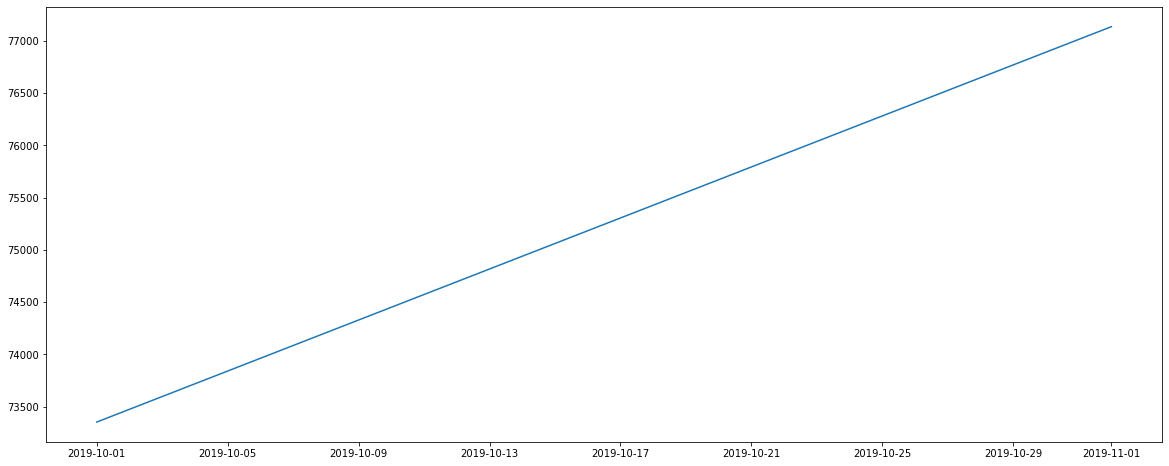

In [23]:
#No of visitors by date
data = df.loc[:,['event_time','user_id']]
#Extracting only dates
data['event_time'] = data['event_time'].apply(lambda s: str(s)[0:10])
visitor_by_date = data.drop_duplicates().groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()

In [24]:
df['brand'].value_counts()

samsung      169160
apple        143561
xiaomi        86131
huawei        35013
oppo          15249
              ...  
speroni           1
espiro            1
lange             1
kingslong         1
aiken             1
Name: brand, Length: 1435, dtype: int64

In [25]:
df['event_type'].value_counts()

view        832492
cart         20279
purchase     19955
Name: event_type, dtype: int64

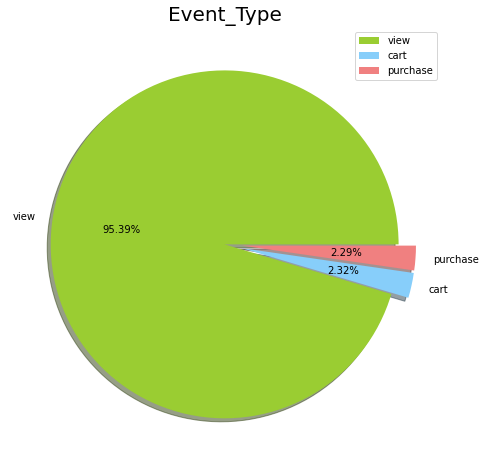

In [26]:
labels = ['view', 'cart','purchase']
size = df['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [27]:
title_type = df.groupby('brand').agg('count')
print(title_type)

          Unnamed: 0  event_time  event_type  product_id  category_code  \
brand                                                                     
a-elita            6           6           6           6              6   
aardwolf           2           2           2           2              2   
abtoys             2           2           2           2              2   
acd                2           2           2           2              2   
acer           14262       14262       14262       14262          14262   
...              ...         ...         ...         ...            ...   
zoom              10          10          10          10             10   
zorg               6           6           6           6              6   
zotac             16          16          16          16             16   
zte              268         268         268         268            268   
zubr              37          37          37          37             37   

          price  user_id

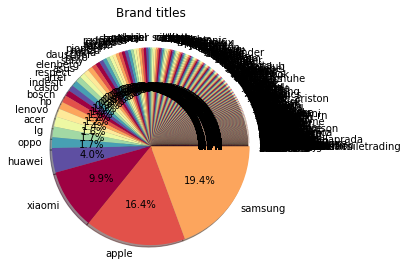

In [28]:
type_labels = title_type.user_id.sort_values().index
type_counts = title_type.user_id.sort_values()
plt.figure(1,figsize =(20,10))
the_grid = GridSpec(2,2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0,1,8)]
plt.subplot(the_grid[0,1],aspect=1,title = 'Brand titles')
type_show_ids = plt.pie(type_counts,labels = type_labels,autopct = '%1.1f%%',shadow = True,colors = colors)
plt.show()

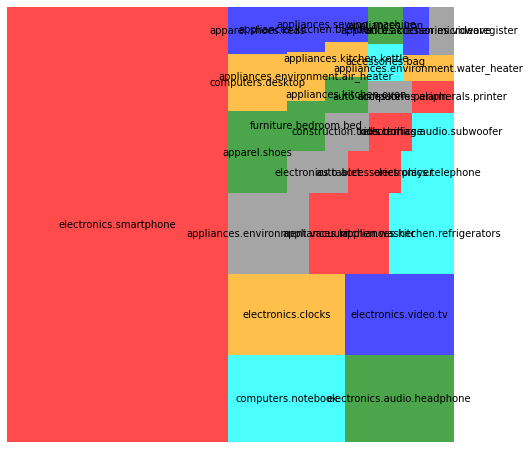

In [29]:
top_category_n = 30
top_category = df.loc[:,'category_code'].value_counts()[:top_category_n].sort_values(ascending=False)
squarify.plot(sizes=top_category, label=top_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

In [30]:
view_count = df['event_type'].value_counts()[0]
cart_count = df['event_type'].value_counts()[1]
purchase_count = df['event_type'].value_counts()[2]
print("Rate of conversion between view and purchase events" +str((purchase_count/view_count)*100) +'%')
print("Rate of conversion between view and add to cart events" +str((cart_count/view_count)*100) +'%')
print("Rate of conversion between add to cart and purchase events" +str((purchase_count/cart_count)*100) +'%')

Rate of conversion between view and purchase events2.3970200314237253%
Rate of conversion between view and add to cart events2.4359393243418554%
Rate of conversion between add to cart and purchase events98.40228808126633%


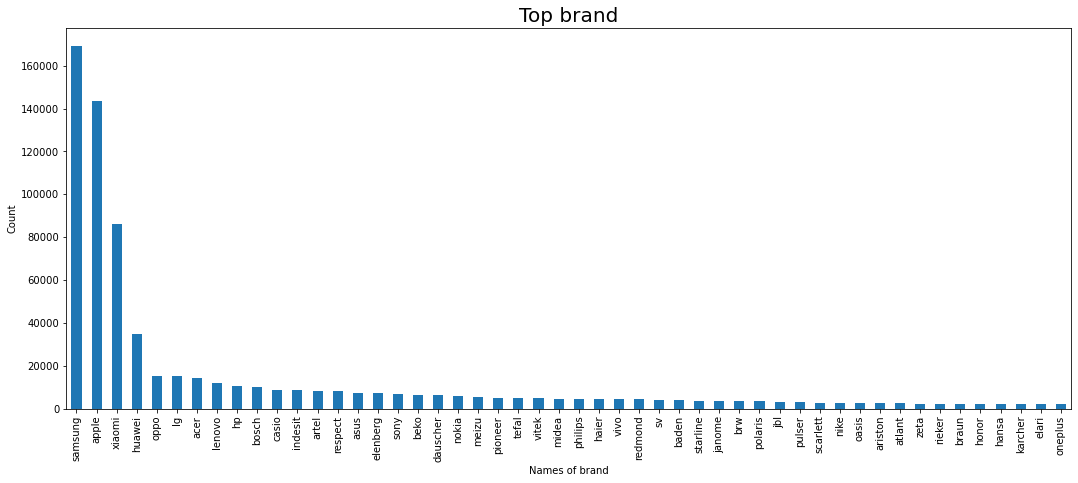

In [31]:
#Brandwise sales of all event types
df['brand'].value_counts().head(50).plot.bar(figsize = (18,7))
plt.title('Top brand',fontsize = 20)
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show()

samsung      6467
apple        5410
xiaomi       1611
huawei        806
oppo          366
             ... 
teknum          1
cityrover       1
portcase        1
stayer          1
moser           1
Name: brand, Length: 450, dtype: int64


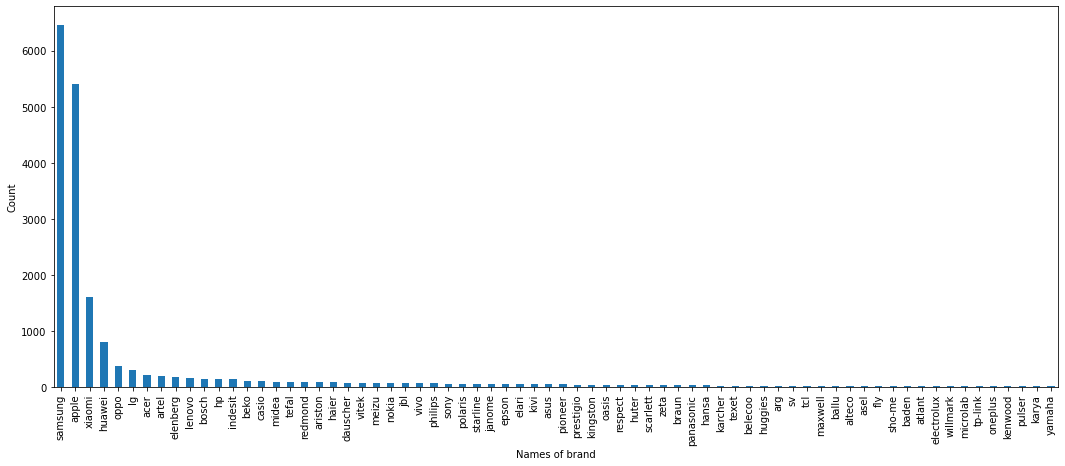

In [32]:
d = df.loc[df['event_type'].isin(['purchase'])].drop_duplicates()
print(d['brand'].value_counts())
d['brand'].value_counts().head(70).plot.bar(figsize =(18,7))
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show()

In [33]:
top_player = df['brand'].value_counts()[0]
second_player = df['brand'].value_counts()[1]
last_player = df['brand'].value_counts()[-1]
print("Top brand saw " +str((top_player/second_player)*100)+"%more sales than second_player in the market")
print("Top brand saw " +str((top_player/last_player)*100)+"%more sales than bottom player in the market")

Top brand saw 117.83144447308113%more sales than second_player in the market
Top brand saw 16916000.0%more sales than bottom player in the market


In [34]:
purchase = df.loc[df['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase.head()

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
111,162,2019-10-01 00:02:14 UTC,purchase,1004856.0,electronics.smartphone,samsung,130.75000,543272960.0,8187d148-3c41-46d4-b0c0-9c08cd9dc564
197,308,2019-10-01 00:04:37 UTC,purchase,1002532.0,electronics.smartphone,apple,642.50000,551377664.0,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
268,442,2019-10-01 00:07:07 UTC,purchase,13800054.0,furniture.bathroom.toilet,santeri,54.40625,555332736.0,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
339,574,2019-10-01 00:09:26 UTC,purchase,4804055.0,electronics.audio.headphone,apple,189.87500,524601184.0,2af9b570-0942-4dcd-8f25-4d84fba82553
352,603,2019-10-01 00:09:54 UTC,purchase,4804056.0,electronics.audio.headphone,apple,162.00000,551377664.0,3c80f0d6-e9ec-4181-8c5c-837a30be2d68


In [35]:
purchase

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
111,162,2019-10-01 00:02:14 UTC,purchase,1004856.0,electronics.smartphone,samsung,130.75000,543272960.0,8187d148-3c41-46d4-b0c0-9c08cd9dc564
197,308,2019-10-01 00:04:37 UTC,purchase,1002532.0,electronics.smartphone,apple,642.50000,551377664.0,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
268,442,2019-10-01 00:07:07 UTC,purchase,13800054.0,furniture.bathroom.toilet,santeri,54.40625,555332736.0,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
339,574,2019-10-01 00:09:26 UTC,purchase,4804055.0,electronics.audio.headphone,apple,189.87500,524601184.0,2af9b570-0942-4dcd-8f25-4d84fba82553
352,603,2019-10-01 00:09:54 UTC,purchase,4804056.0,electronics.audio.headphone,apple,162.00000,551377664.0,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
...,...,...,...,...,...,...,...,...,...
872572,698291,2019-11-01 11:57:48 UTC,purchase,1002544.0,electronics.smartphone,apple,458.25000,512625152.0,fe258a6f-a2e0-4f9d-aadd-7a0e1540cb05
872625,698373,2019-11-01 11:57:51 UTC,purchase,4804718.0,electronics.audio.headphone,apple,360.00000,551663552.0,908d772e-de90-4b11-80e4-8da5a7447b05
872668,698443,2019-11-01 11:57:55 UTC,purchase,1002524.0,electronics.smartphone,apple,531.50000,514488704.0,2d0dd729-553f-46d9-bd4b-6600591736fc
872672,698448,2019-11-01 11:57:56 UTC,purchase,1004856.0,electronics.smartphone,samsung,128.12500,529669888.0,e1dab160-1d9a-4d59-88a1-4fc63035e35f


In [36]:
top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
samsung,6467
apple,5410
xiaomi,1611
huawei,806
oppo,366
lg,294
acer,220
artel,195
elenberg,184


In [37]:
df.loc[df.user_session =="ef3daa59-4936-43e5-a530-32902f64b2f4"].sort_values(by = "event_time")

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
442228,2169,2019-11-01 00:14:32 UTC,view,1005105.0,electronics.smartphone,apple,1349.0,518840512.0,ef3daa59-4936-43e5-a530-32902f64b2f4
442286,2275,2019-11-01 00:15:10 UTC,cart,1005105.0,electronics.smartphone,apple,1349.0,518840512.0,ef3daa59-4936-43e5-a530-32902f64b2f4
442306,2309,2019-11-01 00:15:23 UTC,purchase,1005105.0,electronics.smartphone,apple,1349.0,518840512.0,ef3daa59-4936-43e5-a530-32902f64b2f4
442346,2374,2019-11-01 00:15:46 UTC,view,1005105.0,electronics.smartphone,apple,1349.0,518840512.0,ef3daa59-4936-43e5-a530-32902f64b2f4


In [38]:
user_ID = 518267348
df.loc[df['user_id'] == user_ID]

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
441999,1748,2019-11-01 00:11:48 UTC,view,1005129.0,electronics.smartphone,apple,1337.0,518267360.0,61f913b1-ed5f-4495-8139-7e3e20be92c3
442047,1822,2019-11-01 00:12:16 UTC,cart,1005129.0,electronics.smartphone,apple,1337.0,518267360.0,61f913b1-ed5f-4495-8139-7e3e20be92c3
442120,1951,2019-11-01 00:13:10 UTC,purchase,1005129.0,electronics.smartphone,apple,1337.0,518267360.0,61f913b1-ed5f-4495-8139-7e3e20be92c3
442291,2285,2019-11-01 00:15:14 UTC,view,1005105.0,electronics.smartphone,apple,1349.0,518267360.0,af95bb12-1956-40a4-a703-fcae492b2fb6
442414,2520,2019-11-01 00:16:46 UTC,view,1005129.0,electronics.smartphone,apple,1337.0,518267360.0,4a1fa3dc-f7ed-4880-8e86-9b9f87045464
442505,2678,2019-11-01 00:17:47 UTC,view,1005129.0,electronics.smartphone,apple,1337.0,518267360.0,4a1fa3dc-f7ed-4880-8e86-9b9f87045464
442522,2706,2019-11-01 00:17:57 UTC,view,1005105.0,electronics.smartphone,apple,1349.0,518267360.0,4a1fa3dc-f7ed-4880-8e86-9b9f87045464
442570,2800,2019-11-01 00:18:32 UTC,view,1005105.0,electronics.smartphone,apple,1349.0,518267360.0,4a1fa3dc-f7ed-4880-8e86-9b9f87045464
442618,2868,2019-11-01 00:18:57 UTC,view,1005105.0,electronics.smartphone,apple,1349.0,518267360.0,4a1fa3dc-f7ed-4880-8e86-9b9f87045464
442622,2875,2019-11-01 00:19:00 UTC,view,1005105.0,electronics.smartphone,apple,1349.0,518267360.0,4a1fa3dc-f7ed-4880-8e86-9b9f87045464


In [39]:
user_ID = 543272960
df.loc[df['user_id'] == user_ID]

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
87,129,2019-10-01 00:01:46 UTC,view,1004856.0,electronics.smartphone,samsung,130.750,543272960.0,8187d148-3c41-46d4-b0c0-9c08cd9dc564
111,162,2019-10-01 00:02:14 UTC,purchase,1004856.0,electronics.smartphone,samsung,130.750,543272960.0,8187d148-3c41-46d4-b0c0-9c08cd9dc564
133,201,2019-10-01 00:02:48 UTC,view,1004856.0,electronics.smartphone,samsung,130.750,543272960.0,8187d148-3c41-46d4-b0c0-9c08cd9dc564
144,218,2019-10-01 00:03:02 UTC,view,1004856.0,electronics.smartphone,samsung,130.750,543272960.0,8187d148-3c41-46d4-b0c0-9c08cd9dc564
35992,57666,2019-10-01 03:41:58 UTC,view,1004856.0,electronics.smartphone,samsung,130.750,543272960.0,3591a683-59b0-41d0-94b7-fbc381401119
36351,58225,2019-10-01 03:42:37 UTC,purchase,1004856.0,electronics.smartphone,samsung,130.750,543272960.0,3591a683-59b0-41d0-94b7-fbc381401119
36637,58698,2019-10-01 03:43:11 UTC,view,1004856.0,electronics.smartphone,samsung,130.750,543272960.0,3591a683-59b0-41d0-94b7-fbc381401119
36650,58724,2019-10-01 03:43:13 UTC,view,1004856.0,electronics.smartphone,samsung,130.750,543272960.0,3591a683-59b0-41d0-94b7-fbc381401119
446457,9863,2019-11-01 00:55:26 UTC,view,1004856.0,electronics.smartphone,samsung,128.375,543272960.0,cf58a040-f8b2-40c2-9b4f-0b9122f834ce
446930,10671,2019-11-01 00:59:05 UTC,purchase,1004856.0,electronics.smartphone,samsung,128.375,543272960.0,cf58a040-f8b2-40c2-9b4f-0b9122f834ce


# RFM

In [40]:
data = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\Cleaned_Data.csv")

In [41]:
data

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
0,1,2019-10-01 00:00:00 UTC,view,3900821.0,appliances.environment.water_heater,aqua,33.20,554748717.0,9333dfbd-b87a-4708-9857-6336556b0fcc
1,3,2019-10-01 00:00:01 UTC,view,1307067.0,computers.notebook,lenovo,251.74,550050854.0,7c90fc70-0e80-4590-96f3-13c02c18c713
2,4,2019-10-01 00:00:04 UTC,view,1004237.0,electronics.smartphone,apple,1081.98,535871217.0,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
3,5,2019-10-01 00:00:05 UTC,view,1480613.0,computers.desktop,pulser,908.62,512742880.0,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
4,8,2019-10-01 00:00:10 UTC,view,28719074.0,apparel.shoes.keds,baden,102.71,520571932.0,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
...,...,...,...,...,...,...,...,...,...
872721,698526,2019-11-01 11:57:59 UTC,view,1004767.0,electronics.smartphone,samsung,242.18,520256246.0,73f84130-6ea4-424b-a3a5-548f59fee7ac
872722,698527,2019-11-01 11:57:59 UTC,view,1003801.0,electronics.smartphone,apple,635.10,559202720.0,9d92715b-e373-41aa-880b-ec36b5889636
872723,698528,2019-11-01 11:57:59 UTC,view,1201429.0,electronics.tablet,bq,53.88,561845754.0,bc6ae220-b3b0-4ddf-ad80-144b0414db03
872724,698530,2019-11-01 11:57:59 UTC,view,22400179.0,electronics.audio.microphone,sven,4.44,565902979.0,61d7776a-8ce2-4ac5-8924-bed8fefb86ce


In [42]:
data.drop(columns="Unnamed: 0", inplace=True)

In [43]:
data=data.loc[data.event_type == 'purchase']

In [44]:
data.shape

(19955, 8)

In [45]:
%%time
data['event_time']=pd.to_datetime(data['event_time']).dt.tz_convert(None)

Wall time: 1.39 s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [46]:
data.dtypes

event_time       datetime64[ns]
event_type               object
product_id              float64
category_code            object
brand                    object
price                   float64
user_id                 float64
user_session             object
dtype: object

In [47]:
%%time
#save dataframe as feather in case our notebook got crashed
#feather save column data types
import pyarrow.feather as feather
os.makedirs('tmp', exist_ok=True)  # Make a temp dir for storing the feather file
feather.write_feather(data, "C:\\Users\\LENOVO\\Desktop\\feather_data.csv")

Wall time: 32 ms


In [48]:
%%time
#load the feather data cause feather more lightweight
data = pd.read_feather("C:\\Users\\LENOVO\\Desktop\\feather_data.csv")
data

Wall time: 7.95 ms


,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:02:14,purchase,1004856.0,electronics.smartphone,samsung,130.76,543272936.0,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,2019-10-01 00:04:37,purchase,1002532.0,electronics.smartphone,apple,642.69,551377651.0,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2,2019-10-01 00:07:07,purchase,13800054.0,furniture.bathroom.toilet,santeri,54.42,555332717.0,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
3,2019-10-01 00:09:26,purchase,4804055.0,electronics.audio.headphone,apple,189.91,524601178.0,2af9b570-0942-4dcd-8f25-4d84fba82553
4,2019-10-01 00:09:54,purchase,4804056.0,electronics.audio.headphone,apple,161.98,551377651.0,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
...,...,...,...,...,...,...,...,...
19950,2019-11-01 11:57:48,purchase,1002544.0,electronics.smartphone,apple,458.25,512625151.0,fe258a6f-a2e0-4f9d-aadd-7a0e1540cb05
19951,2019-11-01 11:57:51,purchase,4804718.0,electronics.audio.headphone,apple,360.09,551663523.0,908d772e-de90-4b11-80e4-8da5a7447b05
19952,2019-11-01 11:57:55,purchase,1002524.0,electronics.smartphone,apple,531.26,514488695.0,2d0dd729-553f-46d9-bd4b-6600591736fc
19953,2019-11-01 11:57:56,purchase,1004856.0,electronics.smartphone,samsung,128.18,529669904.0,e1dab160-1d9a-4d59-88a1-4fc63035e35f


In [49]:
data.dtypes

event_time       datetime64[ns]
event_type               object
product_id              float64
category_code            object
brand                    object
price                   float64
user_id                 float64
user_session             object
dtype: object

In [50]:
data.shape

(19955, 8)

In [51]:
data=data.groupby(by='user_session').agg(Date_order=('event_time',lambda x: x.max()),
                                                  user_id=('user_id',lambda x: x.unique()),
                                          Quantity=('user_session','count'),
                                         money_spent=('price','sum')).reset_index(drop=True)
data

,Date_order,user_id,Quantity,money_spent
0,2019-10-01 06:10:46,541539898.0,1,9.76
1,2019-11-01 06:37:53,512584068.0,1,22.80
2,2019-11-01 06:31:50,566342949.0,1,771.45
3,2019-10-01 08:31:51,541146978.0,1,383.51
4,2019-11-01 10:05:07,561589483.0,2,634.29
...,...,...,...,...
17128,2019-11-01 04:05:28,529831093.0,1,157.53
17129,2019-11-01 08:23:32,515436065.0,1,317.64
17130,2019-11-01 08:35:33,563827236.0,2,256.84
17131,2019-10-01 04:01:32,548736783.0,1,203.35


# RFM Analysis

In [52]:
data['Date_order'].max()

Timestamp('2019-11-01 11:57:58')

In [53]:
import datetime as dt
study_date = dt.datetime(2019,12,1)
data=pd.DataFrame(data)
data['last_purchase']=study_date - data['Date_order']
data['last_purchase'].astype('timedelta64[D]')
data['last_purchase']=data['last_purchase'] / np.timedelta64(1, 'D')
data.head()

,Date_order,user_id,Quantity,money_spent,last_purchase
0,2019-10-01 06:10:46,541539898.0,1,9.76,60.742523
1,2019-11-01 06:37:53,512584068.0,1,22.80,29.723692
2,2019-11-01 06:31:50,566342949.0,1,771.45,29.727894
3,2019-10-01 08:31:51,541146978.0,1,383.51,60.644549
4,2019-11-01 10:05:07,561589483.0,2,634.29,29.579780


In [54]:
#Calculate Recency, Frequency, and Monetary of the data
RFM= data.groupby('user_id').agg(Recency=('last_purchase',lambda x: x.min()),
                                 Frequency=('user_id',lambda x: x.count()),
                                 Monetary=('money_spent',lambda x: x.sum()))
RFM.head()

,Recency,Frequency,Monetary
user_id,,,
457360398.0,60.817442,1.0,51.46
469200473.0,60.633206,1.0,615.56
477366703.0,60.722280,1.0,40.39
486999716.0,29.976181,1.0,242.72
502469352.0,60.636632,1.0,772.19


In [55]:
RFM['Recency'].describe()

count    14841.000000
mean        45.233146
std         15.483382
min         29.501412
25%         29.679074
50%         60.440162
75%         60.646331
max         60.995058
Name: Recency, dtype: float64

In [56]:
RFM['Frequency'].describe()

count    14841.000000
mean         1.154437
std          0.530729
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: Frequency, dtype: float64

In [57]:
RFM['Monetary'].describe()

count    14841.000000
mean       510.360179
std        773.766845
min          0.880000
25%        130.760000
50%        254.760000
75%        607.270000
max      20301.280000
Name: Monetary, dtype: float64

# RFM Segmentation

In [58]:
RFM.quantile(q=[0.25,0.5,0.75])

,Recency,Frequency,Monetary
0.25,29.679074,1.0,130.76
0.50,60.440162,1.0,254.76
0.75,60.646331,1.0,607.27


In [59]:
quartiles=RFM.quantile(q=[0.25,0.5,0.75]).to_dict()
quartiles

{'Recency': {0.25: 29.679074074074073,
  0.5: 60.440162037037034,
  0.75: 60.64633101851852},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 130.76, 0.5: 254.76, 0.75: 607.27}}

# Creation of RFM Segments

In [60]:
## for Recency 

def R(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary 

def FM(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1  

In [61]:
#create RFM segmentation column
RFM['R_Quartile'] = RFM['Recency'].apply(R, args=('Recency',quartiles,))
RFM['F_Quartile'] = RFM['Frequency'].apply(FM, args=('Frequency',quartiles,))
RFM['M_Quartile'] = RFM['Monetary'].apply(FM, args=('Monetary',quartiles,))
RFM['RFM_segmentation'] = RFM.R_Quartile.map(str) \
                    + RFM.F_Quartile.map(str) \
                    + RFM.M_Quartile.map(str)
RFM['RFM_score'] = RFM.R_Quartile.map(int) \
                    + RFM.F_Quartile.map(int) \
                    + RFM.M_Quartile.map(int)
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
user_id,,,,,,,,
457360398.0,60.817442,1.0,51.46,4,4,4,444,12
469200473.0,60.633206,1.0,615.56,3,4,1,341,8
477366703.0,60.722280,1.0,40.39,4,4,4,444,12
486999716.0,29.976181,1.0,242.72,2,4,3,243,9
502469352.0,60.636632,1.0,772.19,3,4,1,341,8


In [62]:
# Define rfm_level function
def RFM_label(data):
    if data['RFM_score'] >= 10:
        return 'Lost'
    elif ((data['RFM_score'] >= 9) and (data['RFM_score'] < 10)):
        return 'Hibernating'
    elif ((data['RFM_score'] >= 8) and (data['RFM_score'] < 9)):
        return 'Can’t Lose Them'
    elif ((data['RFM_score'] >= 7) and (data['RFM_score'] < 8)):
        return 'About To Sleep'
    elif ((data['RFM_score'] >= 6) and (data['RFM_score'] < 7)):
        return 'Promising'
    elif ((data['RFM_score'] >= 5) and (data['RFM_score'] < 6)):
        return 'Potential Loyalist'
    elif ((data['RFM_score'] >= 4) and (data['RFM_score'] < 5)):
        return 'Loyal Customers'
    else:
        return 'Champions'
#Create RFM label for customer
RFM['RFM_label'] = RFM.apply(RFM_label, axis=1)
RFM.head(25)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_label
user_id,,,,,,,,,
457360398.0,60.817442,1.0,51.46,4,4,4,444,12,Lost
469200473.0,60.633206,1.0,615.56,3,4,1,341,8,Can’t Lose Them
477366703.0,60.722280,1.0,40.39,4,4,4,444,12,Lost
486999716.0,29.976181,1.0,242.72,2,4,3,243,9,Hibernating
502469352.0,60.636632,1.0,772.19,3,4,1,341,8,Can’t Lose Them
504429960.0,60.825081,1.0,275.66,4,4,2,442,10,Lost
511231471.0,60.455787,1.0,348.53,3,4,2,342,9,Hibernating
512363712.0,60.532454,2.0,197.01,3,1,3,313,7,About To Sleep
512364387.0,60.609884,1.0,161.93,3,4,3,343,10,Lost


In [63]:
# Calculate average values for each RFM_Level, and return a size of each segment 
RFM_desc = RFM.groupby('RFM_label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(RFM_desc)

                   Recency Frequency Monetary      
                      mean      mean     mean count
RFM_label                                          
About To Sleep        32.1       1.1    691.5  1629
Can’t Lose Them       39.8       1.0    552.7  2435
Champions             29.6       2.8   2197.0   334
Hibernating           44.2       1.0    419.0  3263
Lost                  55.4       1.0    162.8  5400
Loyal Customers       29.9       2.3   1151.9   369
Potential Loyalist    48.4       2.4   1486.7   416
Promising             38.1       1.4   1084.0   995


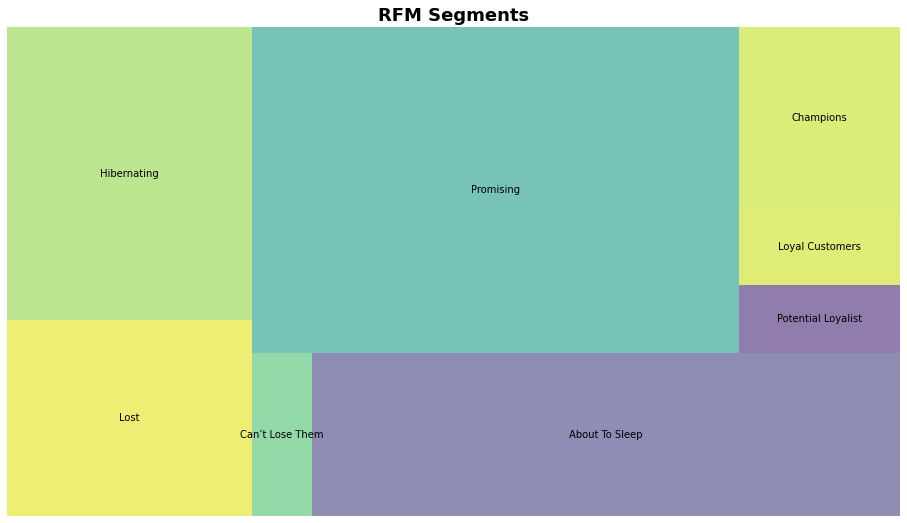

In [64]:
RFM_desc.columns = RFM_desc.columns.droplevel()
RFM_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_desc['Count'], 
              label=['Lost',
                     'Hibernating',
                     'Can’t Lose Them',
                     'About To Sleep',
                     'Promising', 
                     'Potential Loyalist', 
                     'Loyal Customers',
                     'Champions'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# RFM DONE (Needs more visuals and percentages & plotly not matplot)

### Now that we've identified our customer categories, we can decide how to approach or deal with each customer.

Champions : Reward them. Can be early adopters of new products. Will promote your brand. Most likely to send referrals.
Loyal Customer : Upsell higher value products. Ask for reviews.
Potential Loyalist : Offer membership / loyalty program. Keep them engaged. Offer personalised recommendations.
Promising : Offer coupons. Bring them back to the platform and keep them engaged. Offer personalised recommendations.
About to Sleep : Win them back via renewals or newer products, don’t lose them to competition. Talk to them if necessary. Spend time on highest possible personalisation.
Can't Lose Them : Provide helpful resources on the site. Send personalised emails.
Hibernating : Make subject lines of emails very personalised. Revive their interest by a specific discount on a specific product.
Lost : Revive interest with reach out campaign. Ignore otherwise.

In [65]:
df = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\Cleaned_Data.csv")

In [66]:
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
0,1,2019-10-01 00:00:00 UTC,view,3900821.0,appliances.environment.water_heater,aqua,33.20,554748717.0,9333dfbd-b87a-4708-9857-6336556b0fcc
1,3,2019-10-01 00:00:01 UTC,view,1307067.0,computers.notebook,lenovo,251.74,550050854.0,7c90fc70-0e80-4590-96f3-13c02c18c713
2,4,2019-10-01 00:00:04 UTC,view,1004237.0,electronics.smartphone,apple,1081.98,535871217.0,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
3,5,2019-10-01 00:00:05 UTC,view,1480613.0,computers.desktop,pulser,908.62,512742880.0,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
4,8,2019-10-01 00:00:10 UTC,view,28719074.0,apparel.shoes.keds,baden,102.71,520571932.0,ac1cd4e5-a3ce-4224-a2d7-ff660a105880


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872726 entries, 0 to 872725
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     872726 non-null  int64  
 1   event_time     872726 non-null  object 
 2   event_type     872726 non-null  object 
 3   product_id     872726 non-null  float64
 4   category_code  872726 non-null  object 
 5   brand          872726 non-null  object 
 6   price          872726 non-null  float64
 7   user_id        872726 non-null  float64
 8   user_session   872726 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 59.9+ MB


In [68]:
df.shape

(872726, 9)

# Preparing data

In [69]:
#List of people who has bought or added products to the cart
cart_purchase_users = df.loc[df["event_type"].isin(["cart","purchase"])]
cart_purchase_users.dropna(how='any', inplace=True)
cart_purchase_users

<ipython-input-69-06309c1c9d3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cart_purchase_users.dropna(how='any', inplace=True)


,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
111,162,2019-10-01 00:02:14 UTC,purchase,1004856.0,electronics.smartphone,samsung,130.76,543272936.0,8187d148-3c41-46d4-b0c0-9c08cd9dc564
197,308,2019-10-01 00:04:37 UTC,purchase,1002532.0,electronics.smartphone,apple,642.69,551377651.0,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
268,442,2019-10-01 00:07:07 UTC,purchase,13800054.0,furniture.bathroom.toilet,santeri,54.42,555332717.0,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
339,574,2019-10-01 00:09:26 UTC,purchase,4804055.0,electronics.audio.headphone,apple,189.91,524601178.0,2af9b570-0942-4dcd-8f25-4d84fba82553
343,583,2019-10-01 00:09:33 UTC,cart,1002524.0,electronics.smartphone,apple,515.67,524325294.0,0b74a829-f9d7-4654-b5b0-35bc9822c238
...,...,...,...,...,...,...,...,...,...
872625,698373,2019-11-01 11:57:51 UTC,purchase,4804718.0,electronics.audio.headphone,apple,360.09,551663523.0,908d772e-de90-4b11-80e4-8da5a7447b05
872668,698443,2019-11-01 11:57:55 UTC,purchase,1002524.0,electronics.smartphone,apple,531.26,514488695.0,2d0dd729-553f-46d9-bd4b-6600591736fc
872672,698448,2019-11-01 11:57:56 UTC,purchase,1004856.0,electronics.smartphone,samsung,128.18,529669904.0,e1dab160-1d9a-4d59-88a1-4fc63035e35f
872683,698464,2019-11-01 11:57:56 UTC,cart,1004836.0,electronics.smartphone,samsung,229.90,561855909.0,42e2d0ad-e0fc-44f2-822d-324e90543b68


In [70]:
cart_purchase_users_all_activity = df.loc[df['user_id'].isin(cart_purchase_users['user_id'])]
cart_purchase_users_all_activity

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
3,5,2019-10-01 00:00:05 UTC,view,1480613.0,computers.desktop,pulser,908.62,512742880.0,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
16,22,2019-10-01 00:00:22 UTC,view,1480714.0,computers.desktop,pulser,921.49,512742880.0,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
33,50,2019-10-01 00:00:37 UTC,view,1701111.0,computers.peripherals.monitor,acer,514.79,547028884.0,3ea7c620-a8d7-45c5-9ced-2e9874e2f549
34,51,2019-10-01 00:00:41 UTC,view,1003141.0,electronics.smartphone,apple,382.97,551377651.0,ca11a570-47da-4630-898b-9a03127703da
49,76,2019-10-01 00:01:04 UTC,view,1004870.0,electronics.smartphone,samsung,286.86,516489361.0,7d6d03fb-39d6-4143-8694-981a550acaaa
...,...,...,...,...,...,...,...,...,...
872675,698453,2019-11-01 11:57:56 UTC,view,1003310.0,electronics.smartphone,apple,720.47,513837472.0,d2afcf63-1d76-4187-89f8-57e4d7e48f7b
872681,698460,2019-11-01 11:57:56 UTC,view,1005171.0,electronics.smartphone,samsung,216.09,519936499.0,c847b66f-5127-4915-8327-6bafc3453702
872683,698464,2019-11-01 11:57:56 UTC,cart,1004836.0,electronics.smartphone,samsung,229.90,561855909.0,42e2d0ad-e0fc-44f2-822d-324e90543b68
872709,698504,2019-11-01 11:57:58 UTC,view,1004856.0,electronics.smartphone,samsung,128.18,512987233.0,60b55085-3e0a-4ecb-a79e-e510e4269d3a


In [71]:
activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
activity_in_session = activity_in_session.rename(columns={"event_type":"activity_count"})
activity_in_session

,user_session,activity_count
0,0001dfff-0bb9-45cc-9753-bc69bb5d166f,1
1,0002c5ea-3509-4d0b-9618-7e40925005f0,2
2,000d3153-6d13-49dd-b365-0ae2291f7fb8,4
3,000dffaa-fb7f-4e78-aa33-4bdf6d8c131b,2
4,000e56f6-1aa1-4f9a-80d3-6af831d15861,10
...,...,...
33851,fff30096-d345-43a4-8b01-329283095f38,4
33852,fff4a219-f7ce-47a6-bdab-c4cd09214ce6,2
33853,fff6246b-6597-d550-4453-9387780086fa,1
33854,fff8764c-1694-4103-9489-f3334c6fe9b3,2


In [72]:
def convert_time_to_date(utc_timestamp):
  utc_date = datetime.strptime(utc_timestamp[0:10],'%Y-%m-%d').date()
  return utc_date

In [73]:
df['event_date'] = df['event_time'].apply(lambda s:convert_time_to_date(s))

In [74]:
df_targets = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset = ['event_type','product_id','price','user_id','user_session'])
df_targets["is_purchased"] = np.where(df_targets["event_type"]=="purchase",1,0)
df_targets["is_purchased"] = df_targets.groupby(["user_session","product_id"])["is_purchased"].transform("max")
df_targets = df_targets.loc[df_targets["event_type"]=='cart'].drop_duplicates(["user_session","product_id","is_purchased"])
df_targets['event_weekday'] = df_targets['event_date'].apply(lambda s:s.weekday())
df_targets.dropna(how = 'any',inplace = True)
df_targets["category_code_level1"] = df_targets["category_code"].str.split(".",expand = True)[0].astype('category')
df_targets["category_code_level2"] = df_targets["category_code"].str.split(".",expand = True)[1].astype('category')

In [75]:
df_targets = df_targets.merge(activity_in_session,on = 'user_session',how ='left')
df_targets['activity_count'] = df_targets['activity_count'].fillna(0)
df_targets.head()

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,event_date,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,583,2019-10-01 00:09:33 UTC,cart,1002524.0,electronics.smartphone,apple,515.67,524325294.0,0b74a829-f9d7-4654-b5b0-35bc9822c238,2019-10-01,1,1,electronics,smartphone,4
1,680,2019-10-01 00:11:00 UTC,cart,4804056.0,electronics.audio.headphone,apple,161.98,533624186.0,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,2019-10-01,0,1,electronics,audio,4
2,1325,2019-10-01 02:17:59 UTC,cart,1004833.0,electronics.smartphone,samsung,174.76,536415846.0,685b5b42-f597-4a69-ab4c-ef96a30bc454,2019-10-01,0,1,electronics,smartphone,7
3,1654,2019-10-01 02:19:36 UTC,cart,1005003.0,electronics.smartphone,huawei,258.21,513632293.0,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,2019-10-01,1,1,electronics,smartphone,16
4,1684,2019-10-01 02:19:43 UTC,cart,1004750.0,electronics.smartphone,samsung,197.43,555110488.0,ce885079-4d92-4fe6-92a3-377c5a2d8291,2019-10-01,1,1,electronics,smartphone,10


In [76]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13629 entries, 0 to 13628
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Unnamed: 0            13629 non-null  int64   
 1   event_time            13629 non-null  object  
 2   event_type            13629 non-null  object  
 3   product_id            13629 non-null  float64 
 4   category_code         13629 non-null  object  
 5   brand                 13629 non-null  object  
 6   price                 13629 non-null  float64 
 7   user_id               13629 non-null  float64 
 8   user_session          13629 non-null  object  
 9   event_date            13629 non-null  object  
 10  is_purchased          13629 non-null  int32   
 11  event_weekday         13629 non-null  int64   
 12  category_code_level1  13629 non-null  category
 13  category_code_level2  13629 non-null  category
 14  activity_count        13629 non-null  int64   
dtypes:

In [77]:
#Saving a copy of preprocessed data
df_targets.to_csv("C:\\Users\\LENOVO\\Desktop\\training_data.csv")

In [78]:
df_targets = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\training_data.csv")

In [79]:
df_targets.head()

,Unnamed: 0,Unnamed: 0.1,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,event_date,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,0,583,2019-10-01 00:09:33 UTC,cart,1002524.0,electronics.smartphone,apple,515.67,524325294.0,0b74a829-f9d7-4654-b5b0-35bc9822c238,2019-10-01,1,1,electronics,smartphone,4
1,1,680,2019-10-01 00:11:00 UTC,cart,4804056.0,electronics.audio.headphone,apple,161.98,533624186.0,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,2019-10-01,0,1,electronics,audio,4
2,2,1325,2019-10-01 02:17:59 UTC,cart,1004833.0,electronics.smartphone,samsung,174.76,536415846.0,685b5b42-f597-4a69-ab4c-ef96a30bc454,2019-10-01,0,1,electronics,smartphone,7
3,3,1654,2019-10-01 02:19:36 UTC,cart,1005003.0,electronics.smartphone,huawei,258.21,513632293.0,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,2019-10-01,1,1,electronics,smartphone,16
4,4,1684,2019-10-01 02:19:43 UTC,cart,1004750.0,electronics.smartphone,samsung,197.43,555110488.0,ce885079-4d92-4fe6-92a3-377c5a2d8291,2019-10-01,1,1,electronics,smartphone,10


In [80]:
df_targets.shape

(13629, 16)

In [81]:
df_targets.drop(columns=["Unnamed: 0","Unnamed: 0.1"], inplace=True)

In [82]:
df_targets

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,event_date,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,2019-10-01 00:09:33 UTC,cart,1002524.0,electronics.smartphone,apple,515.67,524325294.0,0b74a829-f9d7-4654-b5b0-35bc9822c238,2019-10-01,1,1,electronics,smartphone,4
1,2019-10-01 00:11:00 UTC,cart,4804056.0,electronics.audio.headphone,apple,161.98,533624186.0,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,2019-10-01,0,1,electronics,audio,4
2,2019-10-01 02:17:59 UTC,cart,1004833.0,electronics.smartphone,samsung,174.76,536415846.0,685b5b42-f597-4a69-ab4c-ef96a30bc454,2019-10-01,0,1,electronics,smartphone,7
3,2019-10-01 02:19:36 UTC,cart,1005003.0,electronics.smartphone,huawei,258.21,513632293.0,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,2019-10-01,1,1,electronics,smartphone,16
4,2019-10-01 02:19:43 UTC,cart,1004750.0,electronics.smartphone,samsung,197.43,555110488.0,ce885079-4d92-4fe6-92a3-377c5a2d8291,2019-10-01,1,1,electronics,smartphone,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13624,2019-11-01 11:57:40 UTC,cart,1002524.0,electronics.smartphone,apple,531.26,512432163.0,faa77623-1f22-4fe2-9750-fef533d4b755,2019-11-01,0,4,electronics,smartphone,2
13625,2019-11-01 11:57:42 UTC,cart,1801690.0,electronics.video.tv,samsung,369.45,566142571.0,ab0d5c57-58d6-41fe-bdce-d006cfd69a45,2019-11-01,0,4,electronics,video,3
13626,2019-11-01 11:57:44 UTC,cart,1004856.0,electronics.smartphone,samsung,128.18,562848205.0,dc325345-dae3-4b14-81a0-72e3f4ef6135,2019-11-01,0,4,electronics,smartphone,2
13627,2019-11-01 11:57:49 UTC,cart,1004653.0,electronics.smartphone,samsung,588.69,566442930.0,2252cf45-3a86-4266-ba3d-87d9c15a28e3,2019-11-01,0,4,electronics,smartphone,4


In [83]:
target = df_targets.iloc[:,9]

In [84]:
target

0        1
1        0
2        0
3        1
4        1
        ..
13624    0
13625    0
13626    0
13627    0
13628    0
Name: is_purchased, Length: 13629, dtype: int64

In [85]:
features = df_targets[['brand','price','event_weekday','category_code_level1','category_code_level2','activity_count']]

# Resampling data to have equal no of purchased and not purchased items

In [86]:
is_purchase_set = df_targets[df_targets['is_purchased'] == 1]
is_purchase_set.shape[0]

7803

In [87]:
not_purchase_set = df_targets[df_targets['is_purchased'] == 0]
not_purchase_set.shape[0]

5826

In [88]:
# n_samples = 5826
# is_purchase_downsampled = resample(is_purchase_set,replace = False,n_samples = n_samples,random_state = 27)
# not_purchase_set_downsampled = resample(not_purchase_set,replace = False,n_samples = n_samples,random_state = 27)

In [89]:
# downsampled = pd.concat([is_purchase_downsampled,not_purchase_set_downsampled])
# downsampled['is_purchased'].value_counts()

In [90]:
#features = downsampled[['brand','price','event_weekday','category_code_level1','category_code_level2','activity_count']]

In [91]:
#features

# Encoding categorical attributes

In [92]:
features.loc[:,'brand'] =LabelEncoder().fit_transform(df_targets.loc[:,'brand'].copy())
features.loc[:,'event_weekday'] = LabelEncoder().fit_transform(df_targets.loc[:,'event_weekday'].copy())
features.loc[:,'category_code_level1'] = LabelEncoder().fit_transform(df_targets.loc[:,'category_code_level1'].copy())
features.loc[:,'category_code_level2'] = LabelEncoder().fit_transform(df_targets.loc[:,'category_code_level2'].copy())
#is_purchased = LabelEncoder().fit_transform(downsampled['is_purchased'])
#features.head()

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [93]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13629 entries, 0 to 13628
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 13629 non-null  int32  
 1   price                 13629 non-null  float64
 2   event_weekday         13629 non-null  int64  
 3   category_code_level1  13629 non-null  int32  
 4   category_code_level2  13629 non-null  int32  
 5   activity_count        13629 non-null  int64  
dtypes: float64(1), int32(3), int64(2)
memory usage: 479.3 KB


# Chi square test - association between two attributes

In [94]:
# import scipy
# import scipy.integrate
# import scipy.special
# from scipy.stats import chi2_contingency

# print()
# print("Chi square test")
# #Event weekday and price
# table = pd.crosstab(features['event_weekday'],features['price'],margins = False)
# stat,p,dof,expected = chi2_contingency(table)
# alpha = 0.05
# print("For weekday of the event and price")
# print("p value is " +str(p))
# if p >= alpha:
#   print("No significant association between these attributes -H0 holds true")
# else:
#   print("significant association between these attributes -H0 is rejected")

In [95]:
# d1 =df[:100000]
# table1 = pd.crosstab(d1['category_id'],d1['user_id'],margins = False)
# stat,p,dof,expected = chi2_contingency(table1)
# alpha = 0.05
# print("For category code and user")
# print("p value is " +str(p))
# if p >= alpha:
#   print("No significant association between these attributes -H0 holds true")
# else:
#   print("significant association between these attributes -H0 is rejected")

# ML models

In [96]:
#Train Test split
X_train ,X_test ,y_train,y_test = train_test_split(features,target,test_size = 0.2,random_state = 0)

# Decision tree classification

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [98]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("fbeta",metrics.fbeta_score(y_test,y_pred,average = 'weighted',beta=0.5))

Accuracy 0.5939104915627292
Precision 0.639225181598063
Recall 0.6738991703892788
fbeta 0.5906718548727382


# XGBoost classification

In [99]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(learning_rate = 0.1)
xg_model.fit(X_train,y_train)
y_pred = xg_model.predict(X_test)

In [100]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("fbeta",metrics.fbeta_score(y_test,y_pred,average = 'weighted',beta=0.5))

Accuracy 0.6474688187820983
Precision 0.6383561643835617
Recall 0.8921506062539886
fbeta 0.6252893037283029


In [101]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#choosing the xgboost hyperparameters that we want to tune
xgb_parameters = [
    { # XGBoost
        'n_estimators': [10,20,30],
        'max_depth': [3,4,5],
        'subsample': [0.2,0.3,0.4]
    }]
#optimizing the performance of xgboost by choosing the best hyperparameters combination
grid_xgb= GridSearchCV(estimator=xg_model, param_grid=xgb_parameters)
grid_xgb.fit(X_train,y_train)
print("Best cross-validation score of xgb: {:.2f}".format(grid_xgb.best_score_))

Best cross-validation score of xgb: 0.66


In [102]:
#checking the best hyperparameters combinations of xgboost with the corresponding optimal accuracy
print(f'The average accuracy is {grid_xgb.best_score_:.2f} with the best parameter combination of {grid_xgb.best_params_}')

The average accuracy is 0.66 with the best parameter combination of {'max_depth': 5, 'n_estimators': 30, 'subsample': 0.3}


# Logistic regression

In [103]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

In [104]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("fbeta",metrics.fbeta_score(y_test,y_pred,average = 'weighted',beta=0.5))

Accuracy 0.5774027879677183
Precision 0.5805825242718446
Recall 0.9540523292916401
fbeta 0.45734558866398056


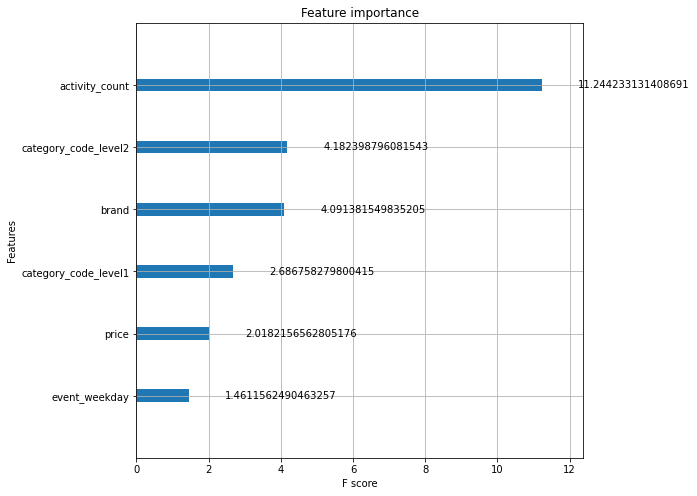

In [105]:
plot_importance(xg_model, max_num_features=10, importance_type ='gain')
plt.rcParams['figure.figsize'] = (40,10)
plt.show()

In [106]:
print(df_targets["brand"].unique())

['apple' 'samsung' 'huawei' 'epson' 'nokia' 'karcher' 'xiaomi' 'artel'
 'meizu' 'lg' 'panasonic' 'beko' 'oppo' 'hp' 'redmond' 'sony' 'prestigio'
 'oasis' 'vivo' 'joie' 'huter' 'pocketbook' 'neoline' 'ariston' 'alteco'
 'kingston' 'canon' 'polaris' 'canyon' 'kitfort' 'acer' 'jbl' 'hyperx'
 'vitek' 'dewalt' 'sho-me' 'starline' 'indesit' 'peg-perego' 'brother'
 'thermex' 'bq' 'steelseries' 'scarlett' 'kivi' 'marshall' 'wingoffly'
 'jaguar' 'saturn' 'janome' 'toyota' 'tcl' 'pituso' 'awei' 'aqua'
 'hyundai' 'midea' 'rastar' 'remington' 'philips' 'logitech' 'ibox'
 'garmin' 'bosch' 'defender' 'trust' 'braun' 'eurolux' 'texet' 'yasin'
 'lenovo' 'belecoo' 'thermaltake' 'pioneer' 'atlant' 'maxwell' 'microlab'
 'dxracer' 'palit' 'lorelli-bertoni' 'delux' 'plantronics' 'asus' 'thomas'
 'lorelli' 'ritmix' 'moulinex' 'arg' 'gopro' 'delonghi' 'decoroom' 'total'
 'cenmax' 'elari' 'aimoto' 'alpine' 'playme' 'amd' 'chicco' 'tefal'
 'centurion' 'tp-link' 'x-game' 'incanto' 'cortland' 'elenberg' 'selby'


In [107]:
print(df_targets["category_code_level1"].unique())

['electronics' 'computers' 'appliances' 'stationery' 'furniture'
 'construction' 'auto' 'kids' 'country_yard' 'apparel' 'medicine' 'sport'
 'accessories']


In [108]:
print(df_targets["category_code_level2"].unique())

['smartphone' 'audio' 'peripherals' 'clocks' 'telephone' 'environment'
 'video' 'iron' 'kitchen' 'cartrige' 'tablet' 'tools' 'ebooks'
 'accessories' 'notebook' 'sewing_machine' 'skates' 'components'
 'carriage' 'personal' 'toys' 'lawn_mower' 'desktop' 'living_room'
 'camera' 'bedroom' 'swing' 'shoes' 'ironing_board' 'bicycle' 'bag'
 'bathroom']


In [109]:
 print(df_targets["event_weekday"].nunique())

2
